In [1]:
import matplotlib.pyplot as plt
# numpy for vectorized array operations
import numpy as np
# pandas for proper tabular manipulation
import pandas as pd
# scipy stats for our subversions
from scipy import stats

In [3]:
# 1. A bank found that the average number of cars waiting during the noon hour at a 
# drive-up window follows a Poisson distribution with a mean of 2 cars. 
# Make a chart of this distribution and answer these questions 
# concerning the probability of cars waiting at the drive-up window.

# What is the probability that no cars drive up in the noon hour?
# What is the probability that 3 or more cars come through the drive through?
# How likely is it that the drive through gets at least 1 car?
λ = 2
cars_dist = stats.poisson(λ)

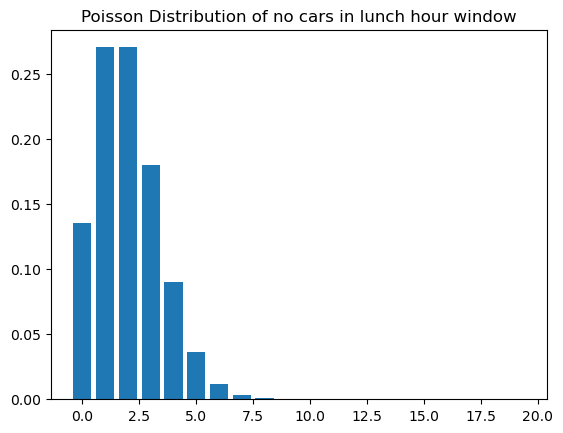

In [7]:
x = range(20)
y = [cars_dist.pmf(x) for x in x]
plt.bar(x, y)
plt.title('Poisson Distribution of no cars in lunch hour window')
plt.show()

In [9]:
# What is the probability that no cars drive up in the noon hour?
cars_dist.pmf(0)

0.1353352832366127

In [11]:
# What is the probability that 3 or more cars come through the drive through?
cars_dist.sf(2)

0.32332358381693654

In [ ]:
# How likely is it that the drive through gets at least 1 car?

In [10]:
1 - cars_dist.sf(0)

0.1353352832366127

In [ ]:
# 2. Grades of State University graduates are normally distributed with a mean of 3.0 
# and a standard deviation of .3. Calculate the following:

# What grade point average is required to be in the top 5% of the graduating class?
# What GPA constitutes the bottom 15% of the class?
# An eccentric alumnus left scholarship money for students in the third decile from the 
# bottom of their class. Determine the range of the third decile. Would a student 
# with a 2.8 grade point average qualify for this scholarship?
# If I have a GPA of 3.5, what percentile am I in?

In [16]:
μ = 3
σ = .3
grades_dist = stats.norm(μ, σ)

In [19]:
# What grade point average is required to be in the top 5% of the graduating class?
round(grades_dist.isf(0.05), 2)

3.49

In [22]:
# What GPA constitutes the bottom 15% of the class?
round(grades_dist.ppf(.15), 2)

2.69

In [25]:
# 1st decile: 0-10 percentile
# 2nd decile: 10-20 percentile
# 3rd decile: 20-30 percentile
first_decile = grades_dist.ppf(.2)
first_decile

2.7475136299281258

In [28]:
second_decile = grades_dist.ppf(0.3)
second_decile

2.842679846187588

In [29]:
low_gpa, high_gpa = grades_dist.ppf([0.2, 0.3])

In [31]:
low_gpa, high_gpa

(2.7475136299281258, 2.842679846187588)

In [32]:
qualify_gpa = 2.8
low_gpa < qualify_gpa < high_gpa

True

In [34]:
# If I have a GPA of 3.5, what percentile am I in?
# top 95%
round(grades_dist.sf(3.5), 2)

0.05

In [3]:
# 3. A marketing website has an average click-through rate of 2%. 
# One day they observe 4326 visitors and 97 click-throughs. 
# How likely is it that this many people or more click through?
click_dist = stats.binom(4326, 0.02)
round(click_dist.sf(96), 2)

0.14

In [5]:
# 4. You are working on some statistics homework consisting of 100 questions where all of the answers 
# are a probability rounded to the hundreths place. Looking to save time, you put down random 
# probabilities as the answer to each question.

# What is the probability that at least one of your first 60 answers is correct?
problem_success = 1 / 100
number_trials = 60
homework_dist = stats.binom(number_trials, problem_success)
round(homework_dist.sf(0), 2)

0.45

In [10]:
# 5. The codeup staff tends to get upset when the student break area is not cleaned up. 
# Suppose that there's a 3% chance that any one student cleans the break area when they visit it, 
# and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
# How likely is it that the break area gets cleaned up each day? How likely is it that it goes two 
# days without getting cleaned up? All week?
problem_success = 0.03
number_trials = int(0.9 * 3 * 22)

In [11]:
cleaning_dist = stats.binom(number_trials, problem_success)

In [13]:
round(cleaning_dist.sf(0), 2)

0.83

In [16]:
stats.binom(((number_trials * 2) + 1), problem_success).pmf(0)

0.026658541032798935

In [23]:
number_trials = round((0.9 * 3 * 22) * 5, 0)

In [26]:
cleaning_dist = stats.binom(number_trials, problem_success)

In [27]:
cleaning_dist.pmf(0)

0.00011781621791054943

In [46]:
# 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
# After several weeks of careful observation, you notice that the average number of people in line when 
# your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
# If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
# what is the likelihood that you have at least 15 minutes left to eat your food before you have to 
# go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.


In [91]:
μ = 15 * 2
σ = 3 * 2 

In [92]:
line_dist = stats.norm(μ, σ)

In [89]:
60 - (15 + 10 + 2)

33

In [94]:
round(line_dist.cdf(33), 2)

0.69

In [88]:
# 7. Connect to the employees database and find the average salary of current employees, along with the 
# standard deviation. For the following questions, calculate the answer based on modeling the employees 
# salaries with a normal distribution defined by the calculated mean and standard deviation then compare 
# this answer to the actual values present in the salaries dataset.

# What percent of employees earn less than 60,000?
# What percent of employees earn more than 95,000?
# What percent of employees earn between 65,000 and 80,000?
# What do the top 5% of employees make?
import env

In [47]:
def get_db_url(user, password, host, database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [56]:
new_url = get_db_url(env.user, env.password, env.host, 'employees')

In [57]:
query = '''
            SELECT * FROM salaries WHERE to_date > NOW()
        '''

In [58]:
df = pd.read_sql(query, new_url)

In [59]:
df

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [68]:
# What percent of employees earn less than 60,000?
employee_salaries = df.salary.agg(['mean', 'std'])

In [71]:
employee_salaries

mean    72012.235857
std     17309.995380
Name: salary, dtype: float64

In [72]:
salary_dist = stats.norm(*employee_salaries)

In [75]:
round(salary_dist.cdf(60_000), 2)

0.24

In [78]:
# What percent of employees earn more than 95,000?
round(salary_dist.sf(95_000), 2)

0.09

In [81]:
# What percent of employees earn between 65,000 and 80,000?
high_salary, low_salary = salary_dist.cdf([80_000, 65_000])
high_salary

0.677763490495318

In [82]:
low_salary

0.3427029219506515

In [85]:
salary_between_80_65 = high_salary - low_salary
round(salary_between_80_65, 2)

0.34

In [86]:
# What do the top 5% of employees make?
salary_dist.isf(0.05)

100484.64454102777

In [87]:
salary_dist.ppf(0.95)

100484.64454102775